## Introduction

We will go through each step to build the \[\[7,1,3\]\] color code, also known as the Stane Code.



## Encoding

We can first start by preparing the logical qubit basis state. This circuit will prepare the logical basis state $|0\rangle_L$ which corresponds to the state/code word:


$$
\begin{align}
|0\rangle_L & = |0000000\rangle+|1010101\rangle+|0110011\rangle+|1100110\rangle \\
& +|0001111\rangle+|1011010\rangle+|0111100\rangle+|1101001\rangle, \notag \\
|1\rangle_L & = X_{1111111}|0\rangle_L \\
& = |1111111\rangle+|0101010\rangle+|1001100\rangle+|0011001\rangle \notag \\
& +|1110000\rangle+|0100101\rangle+|1000011\rangle+|0010110\rangle).
\end{align}
$$


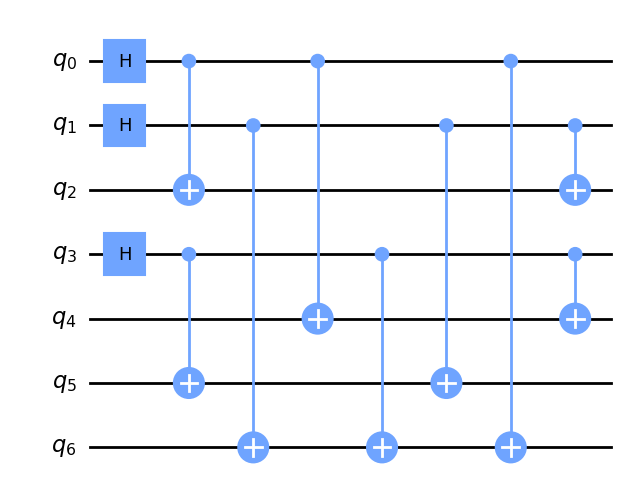

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qreg_q = QuantumRegister(7, "q")

# Encoding circuit to create the logical basis states
encodingcircuit = QuantumCircuit(qreg_q)
encodingcircuit.h(qreg_q[0])
encodingcircuit.h(qreg_q[1])
encodingcircuit.h(qreg_q[3])
encodingcircuit.cx(qreg_q[0], qreg_q[2])
encodingcircuit.cx(qreg_q[3], qreg_q[5])
encodingcircuit.cx(qreg_q[1], qreg_q[6])
encodingcircuit.cx(qreg_q[0], qreg_q[4])
encodingcircuit.cx(qreg_q[3], qreg_q[6])
encodingcircuit.cx(qreg_q[1], qreg_q[5])
encodingcircuit.cx(qreg_q[0], qreg_q[6])
encodingcircuit.cx(qreg_q[1], qreg_q[2])
encodingcircuit.cx(qreg_q[3], qreg_q[4])
encodingcircuit.draw('mpl')

Now, let's verify if we created the right logical state.

In [2]:
from qiskit.quantum_info import Statevector

# Returns the output statevector of the given circuit
statevec = Statevector.from_instruction(encodingcircuit.reverse_bits())
statevec.draw(output = 'latex')

<IPython.core.display.Latex object>

As we can see, this is indeed the correct $|0\rangle_L$ logical state we want to prepare! However, the circuit taken from Quantinuum paper looks different. What's going on here? The extra 8th qubit here is to make sure such a logical state preparation subroutine is fault-tolerant.

<img src="pic/EncodingCircuit_Quantinuum.png" alt="drawing" width="400"/>

Let's try their circuit implementation.

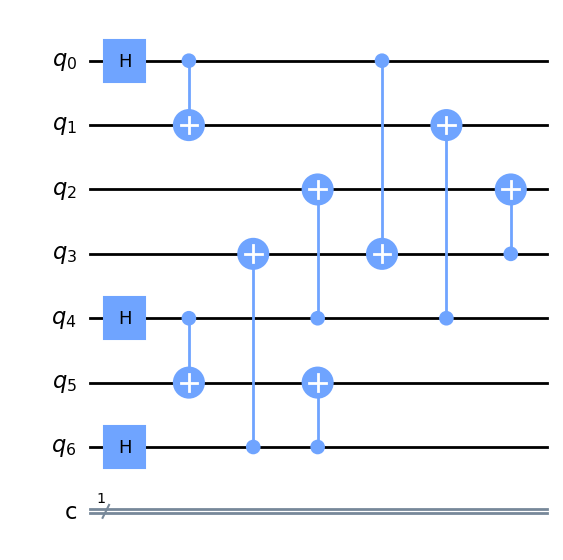

In [15]:
# Implement the quantum circuit from paper
quantinuum_circuit = QuantumCircuit(qreg, creg)
quantinuum_circuit.h(qreg[0])
quantinuum_circuit.h(qreg[4])
quantinuum_circuit.h(qreg[6])
quantinuum_circuit.cx(qreg[0], qreg[1])
quantinuum_circuit.cx(qreg[4], qreg[5])
quantinuum_circuit.cx(qreg[6], qreg[3])
quantinuum_circuit.cx(qreg[4], qreg[2])
quantinuum_circuit.cx(qreg[6], qreg[5])
quantinuum_circuit.cx(qreg[0], qreg[3])
quantinuum_circuit.cx(qreg[4], qreg[1])
quantinuum_circuit.cx(qreg[3], qreg[2])
quantinuum_circuit.draw('mpl')

In [16]:
quantinuum_statevec = Statevector.from_instruction(quantinuum_circuit.reverse_bits())
quantinuum_statevec.draw(output = 'latex')

<IPython.core.display.Latex object>

These still look different from previous results. So what's happening here is Quantinuum's paper using a different index system (right below) to label their physical qubits compare to ours (left below).

Standard index system  | Quantinuum's index system
- | - 
![](pic/colorcode.png) | ![](pic/quantinuum_colorcode.png)

The index mapping to double-check their implementation to the standard one is:

$$
\text{Quantinuum} \rightarrow \text{Standard}: \quad 1 \rightarrow 4, 2 \rightarrow 5, 3\rightarrow 7, 4 \rightarrow 6, 5 \rightarrow 1, 6 \rightarrow 3, 7 \rightarrow 2.
$$

Or in Python

$$
\text{Quantinuum} \rightarrow \text{Standard}: \quad 0 \rightarrow 3, 1 \rightarrow 4, 2\rightarrow 6, 3 \rightarrow 5, 4 \rightarrow 0, 5 \rightarrow 2, 6 \rightarrow 1.
$$

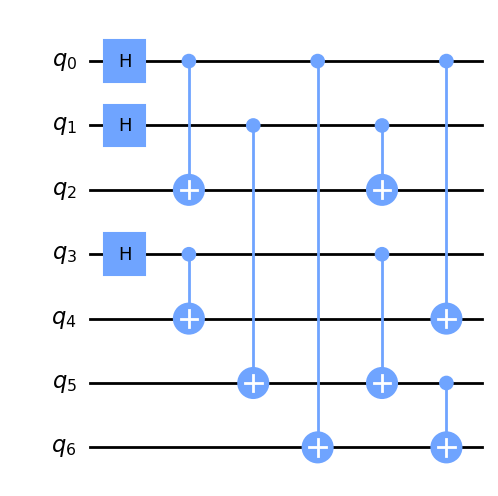

In [17]:
# Change index manually to verify Quantinuum's circuit
quantinuum_mapped_circuit = QuantumCircuit(qreg)
quantinuum_mapped_circuit.h(qreg[3])
quantinuum_mapped_circuit.h(qreg[0])
quantinuum_mapped_circuit.h(qreg[1])
quantinuum_mapped_circuit.cx(qreg[3], qreg[4])
quantinuum_mapped_circuit.cx(qreg[0], qreg[2])
quantinuum_mapped_circuit.cx(qreg[1], qreg[5])
quantinuum_mapped_circuit.cx(qreg[0], qreg[6])
quantinuum_mapped_circuit.cx(qreg[1], qreg[2])
quantinuum_mapped_circuit.cx(qreg[3], qreg[5])
quantinuum_mapped_circuit.cx(qreg[0], qreg[4])
quantinuum_mapped_circuit.cx(qreg[5], qreg[6])
quantinuum_mapped_circuit.draw('mpl')

In [18]:
quantinuum_mapped_statevec = Statevector.from_instruction(quantinuum_mapped_circuit.reverse_bits())
quantinuum_mapped_statevec.draw(output = 'latex')

<IPython.core.display.Latex object>

Yes! It works. The two circuits are equivalent up to a index mapping. Once we verify this, we can just follow Quantinuum's index system.

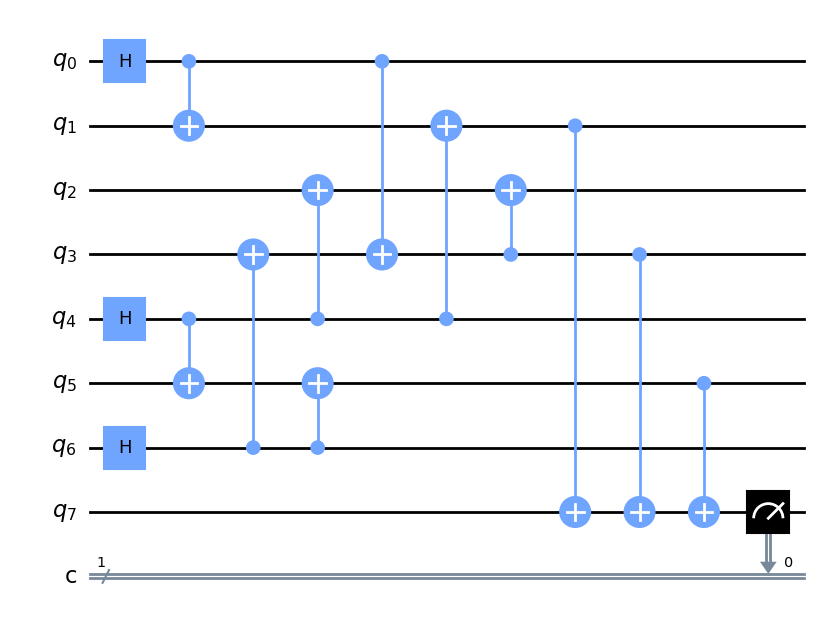

In [14]:
qreg = QuantumRegister(8, "q")
creg = ClassicalRegister(1, "c")

quantinuum_circuit = QuantumCircuit(qreg, creg)
quantinuum_circuit.h(qreg[0])
quantinuum_circuit.h(qreg[4])
quantinuum_circuit.h(qreg[6])
quantinuum_circuit.cx(qreg[0], qreg[1])
quantinuum_circuit.cx(qreg[4], qreg[5])
quantinuum_circuit.cx(qreg[6], qreg[3])
quantinuum_circuit.cx(qreg[4], qreg[2])
quantinuum_circuit.cx(qreg[6], qreg[5])
quantinuum_circuit.cx(qreg[0], qreg[3])
quantinuum_circuit.cx(qreg[4], qreg[1])
quantinuum_circuit.cx(qreg[3], qreg[2])

quantinuum_circuit.cx(qreg[1], qreg[7])
quantinuum_circuit.cx(qreg[3], qreg[7])
quantinuum_circuit.cx(qreg[5], qreg[7])
quantinuum_circuit.measure(qreg[7], creg)
quantinuum_circuit.draw('mpl')

## Error detection



## Decoding

---

## References

1. 